<a href="https://colab.research.google.com/github/GMartinez02/Big-Data---43C8-Fall-2024/blob/Concepts-as-Code/Homework1_PCA_%26_nSVA_with_Vehicle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) PCA Baby

Answers to PCA questions

# B) PCA Applications

### Mounting Colab and Importing Libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
curent_folder='Big Data - 43C8/Homework Code/Homework1'
dest_folder='/content/drive/My Drive/'+curent_folder
os.chdir(dest_folder)
print('Path:',  os.getcwd())

Mounted at /content/drive
Path: /content/drive/My Drive/Big Data - 43C8/Homework Code/Homework1


### Importing "vehicles.csv"

In [31]:
data = pd.read_csv('vehicles.csv')
col_names = list(data.columns)
data.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


###PCA Function


In [5]:
def doPCA (data, normalizaion_bit, PCA_info):
  if normalizaion_bit==1:
    normalized_data=MinMaxScaler().fit_transform(data)
  elif normalizaion_bit==2:
    normalized_data=StandardScaler().fit_transform(data)
  elif normalizaion_bit==3:
    normalized_data=RobustScaler().fit_transform(data)
  elif normalizaion_bit==4:
    normalized_data=MaxAbsScaler().fit_transform(data)
  elif normalizaion_bit==5:
    normalized_data=PowerTransformer(method='yeo-johnson').fit_transform(normalized_data)
  else:
    normalized_data=data

  pca = PCA(n_components=2)
  newData = pca.fit_transform(normalized_data)

  if PCA_info == 1:
    detail = pca.explained_variance_
  if PCA_info == 2:
    detail = pca.explained_variance_ratio_
  if PCA_info == 3:
    detail = pca.components_

  return newData, detail

###Plotting Standardized Data

In [7]:
def PCA_biplot (normalized_PC_object, loadings):
  fig, ax = plt.subplots()

  for i, variables in enumerate(col_names):
      ax.arrow(0,0,
              loadings[0,i],
              loadings[1,i],
              head_length = 0.06,
              head_width = 0.06,
              color = "orange")
      ax.text(loadings[0,i] ,
              loadings[0,i],
              variables,
              color = "orange")

  ax.scatter(PC1, PC2, s = 8)

  ax.set_xlabel('PC1')
  ax.set_ylabel('PC2')
  ax.set_title('Min-Max, Biplot')

  return plt.show()

In [23]:
#Using MinMaxScaler()
min_max_PC, loadings= doPCA(data, 1, 3)  #Dr.Han -> "loadings are componants"
print(min_max_PC.shape)
print(loadings)
print(loadings.shape)

(387, 2)
[[-2.88420038e-01  4.58996544e-01  4.83394343e-03  2.88111558e-02
  -2.77555756e-17  5.47393819e-01 -6.04409415e-01 -4.58323183e-02
  -4.68459058e-02  2.91343115e-02 -1.16143201e-02 -4.27645447e-02
  -3.15267962e-02 -5.38690728e-02  1.16312104e-01  7.41397366e-02
   5.01962697e-02  8.82243487e-02]
 [ 1.64736223e-01  2.86600568e-01 -4.91300948e-02  1.07076997e-02
  -1.11022302e-16  2.33974827e-01  4.69628049e-01  1.53623291e-01
   1.53947643e-01  3.90740022e-01  2.85437481e-01  2.77539296e-01
  -1.60795079e-01 -1.65354986e-01  2.52533238e-01  1.87951789e-01
   1.62424443e-01  2.75210161e-01]]
(2, 18)


In [19]:
#Data for Bipot
min_max_PC, loadings= doPCA(data, 1, 3)
PC1=min_max_PC[:, 0]
PC2=min_max_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2
print(PC1.shape)
print(PC2.shape)

(387,)
(387,)


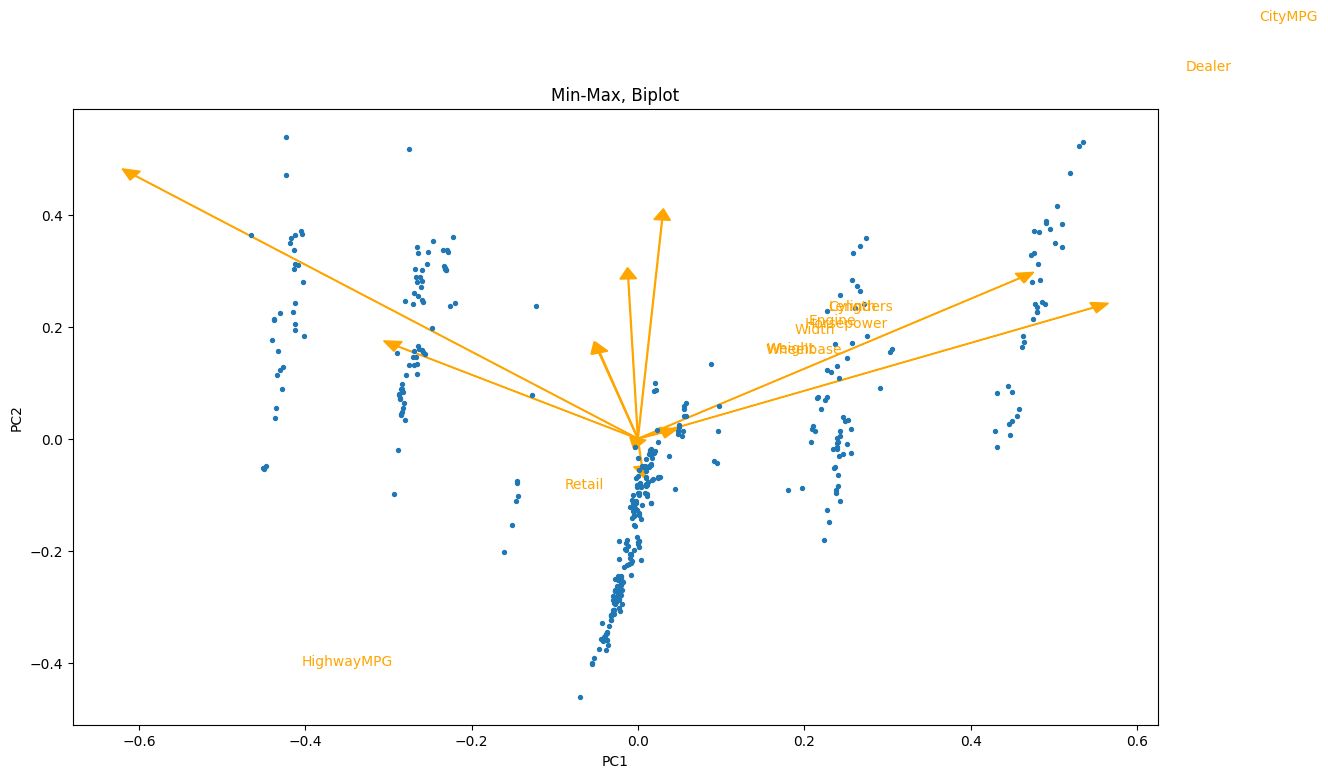

In [21]:
fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.2,loadings[0,i] + 0.2,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Min-Max, Biplot')
plt.show()

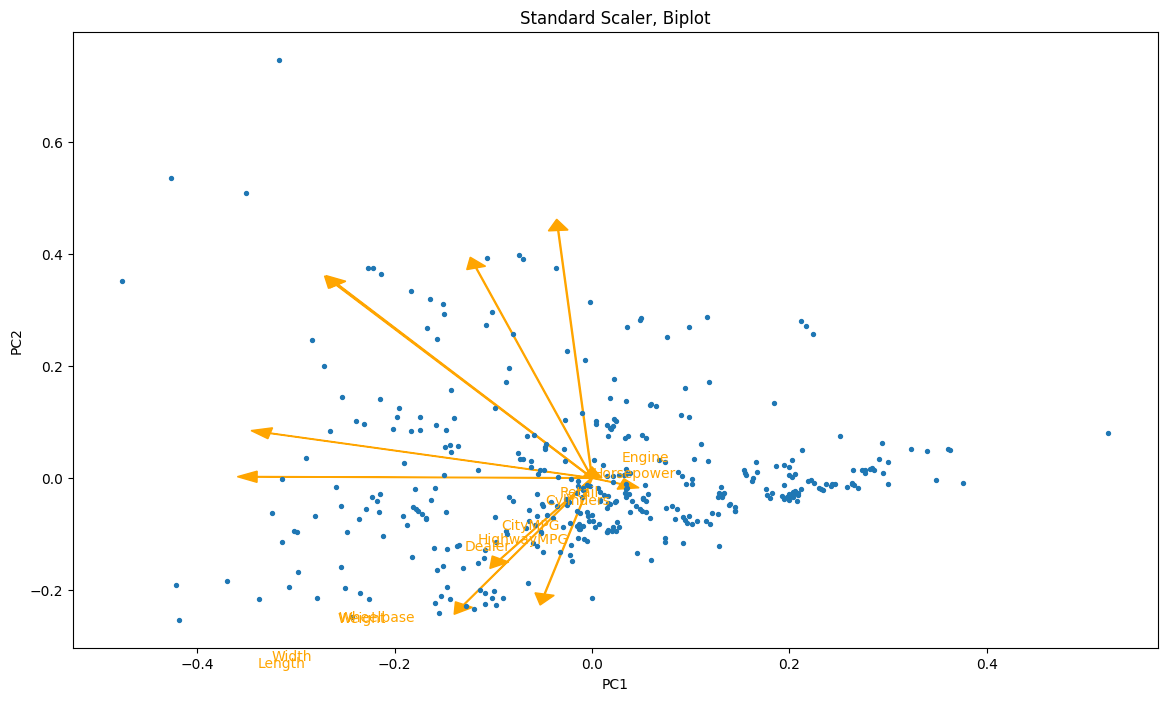

In [27]:
#Data for Bipot
std_scaler_PC, loadings= doPCA(data, 2, 3)
PC1=std_scaler_PC[:, 0]
PC2=std_scaler_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.001,loadings[0,i] + 0.001,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Standard Scaler, Biplot')
plt.show()

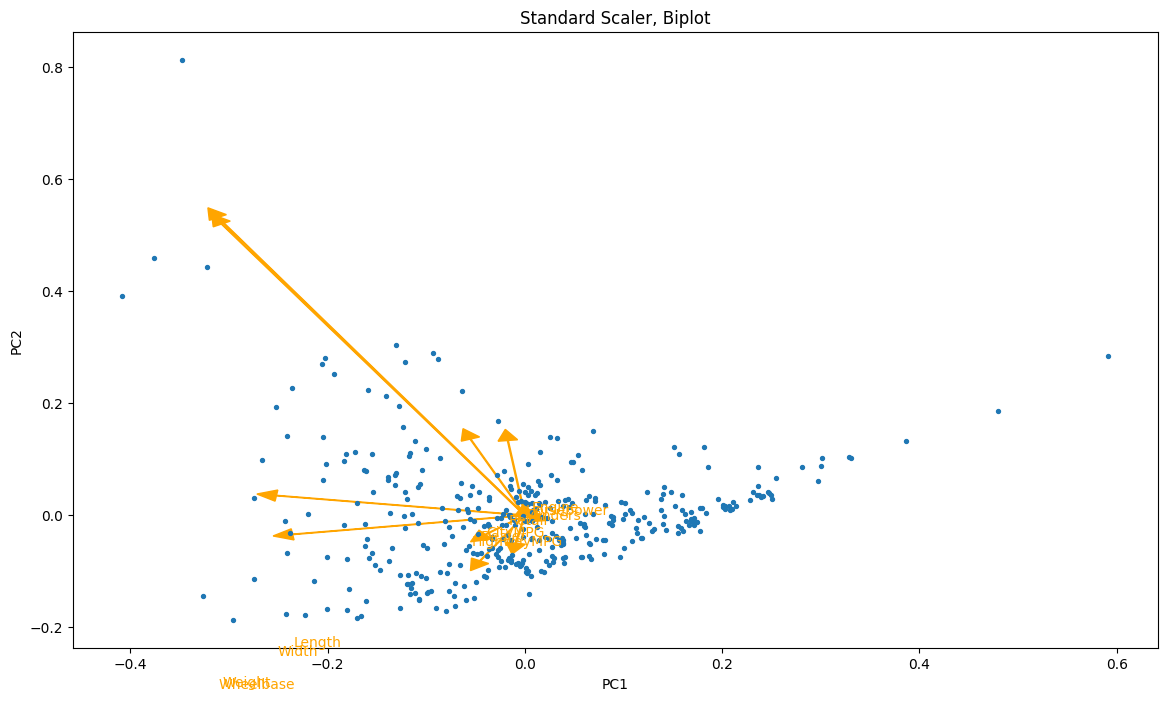

In [28]:
#Data for Bipot
robust_PC, loadings= doPCA(data, 3, 3)
PC1=robust_PC[:, 0]
PC2=robust_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.001,loadings[0,i] + 0.001,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Robust Scaler, Biplot')
plt.show()

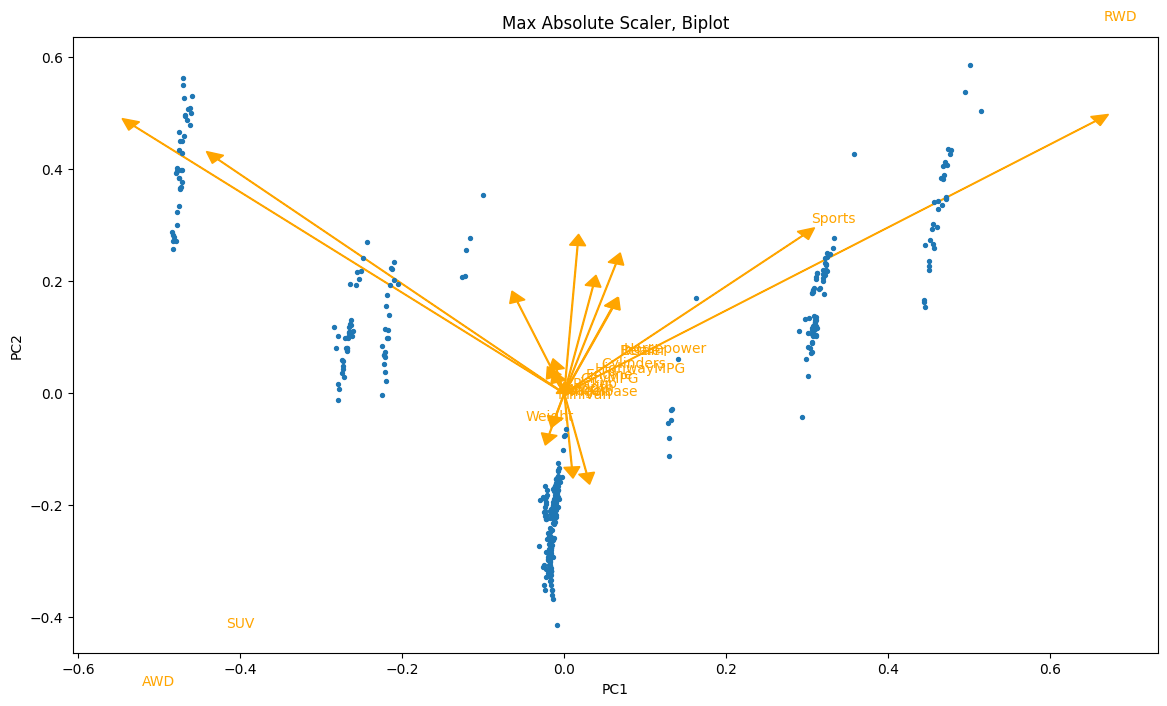

In [33]:
#Data for Bipot
max_abs_PC, loadings= doPCA(data, 4, 3)
PC1=max_abs_PC[:, 0]
PC2=max_abs_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.01,loadings[0,i] + 0.01,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Max Absolute Scaler, Biplot')
plt.show()

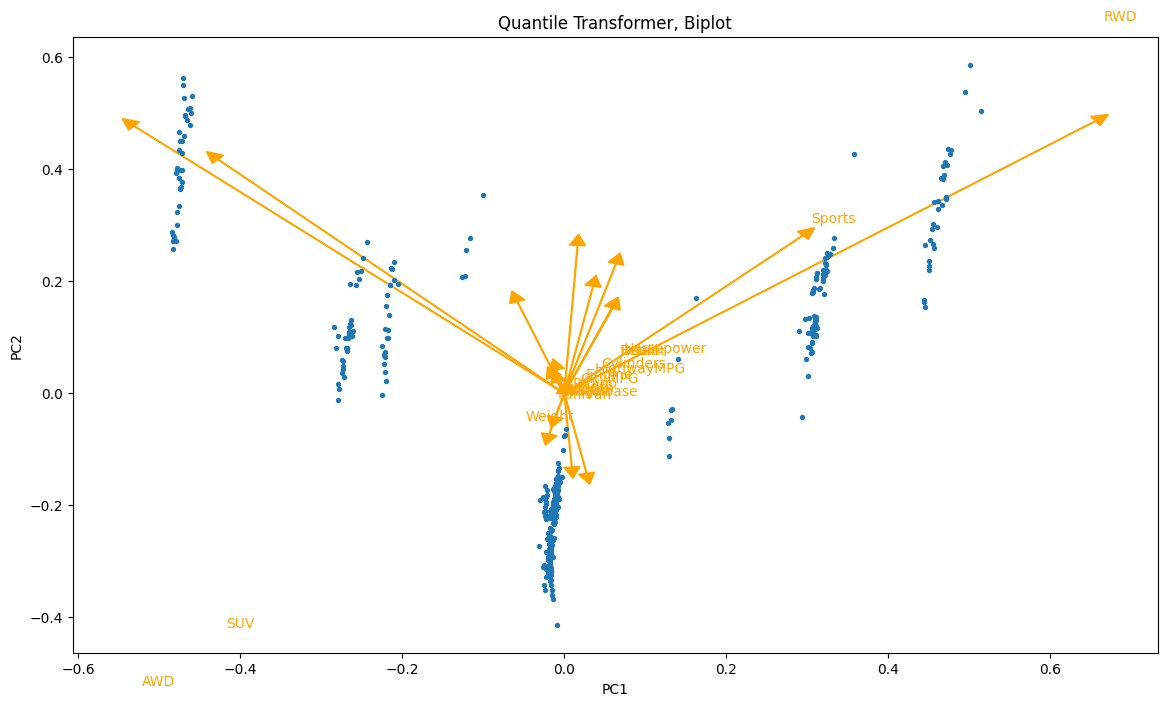

In [34]:
#Data for Bipot
quantile_tf_PC, loadings= doPCA(data, 4, 3)
PC1=quantile_tf_PC[:, 0]
PC2=quantile_tf_PC[:, 1]

scalePC1  = 1/(PC1.max() - PC1.min())
scalePC2  = 1/(PC2.max() - PC2.min())

PC1 = PC1 * scalePC1
PC2 = PC2 * scalePC2

fig, ax = plt.subplots(figsize = (14,8))

for i, variables in enumerate(col_names):
    ax.arrow(0,0,
            loadings[0,i],loadings[1,i],
            head_length = 0.02,
            head_width = 0.02,
            color = "orange")
    ax.text(loadings[0,i] + 0.01,loadings[0,i] + 0.01,
            variables,
            color = "orange",
            fontsize = 10)

ax.scatter(PC1, PC2, s = 8)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Quantile Transformer, Biplot')
plt.show()

### Kmeans and Hierarchical Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#C) PCA extensions

### Performing PCA for **A** and comparing results:

In [51]:
A=np.array([
[1, 2, 0],
[7.2, 5, 9],
[-3, 100, 5.8],
[1, -90, 9.7],
[2, 88, 1.2]
])

raw_data, raw_expl_var_ratios = doPCA(A, 6, 3)
standardized_data, std_expl_var_ratios = doPCA(A, 2, 3)
min_max_data, min_max_expl_var_ratios = doPCA(A, 1, 3)
max_abs_data, max_abs_expl_var_ratios = doPCA(A, 4, 3)
robust_data, robust_expl_var_ratios = doPCA(A, 3, 3)

In [61]:
n,p = A.shape
print(n)

5


In [44]:
results = pd.DataFrame({
    'Method': ['Raw', 'Standardized', 'Min-Max', 'Max-Abs', 'Robust'],
    'Explained Variance Ratios': [raw_expl_var_ratios, std_expl_var_ratios, min_max_expl_var_ratios, max_abs_expl_var_ratios, robust_expl_var_ratios]
})

results.head()

,Method,Explained Variance Ratios
0,Raw,"[[0.014743066045894076, -0.9994741525158416, 0..."
1,Standardized,"[[0.4886850141260514, -0.6249937683275323, 0.6..."
2,Min-Max,"[[0.3362513288121008, -0.5945969318767989, 0.7..."
3,Max-Abs,"[[0.29164728351645, -0.8889361803561431, 0.353..."
4,Robust,"[[0.995792465324303, -0.08053151832175956, 0.0..."


In [45]:
def get_variance_captured(expl_var_ratios):
  return np.sum(expl_var_ratios[:2])

variance_captured = results['Explained Variance Ratios'].apply(get_variance_captured)
max_variance_index = np.argmax(variance_captured)
best_method = results['Method'][max_variance_index]

print(f"The method that captures the most variance in the first two principal components is: {best_method}")


The method that captures the most variance in the first two principal components is: Max-Abs


### Calculating the zero mean data of **A** and the PCs for the given matrices:

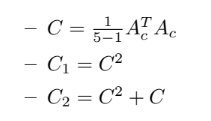

In [49]:
def zero_mean(X):
  n,p = X.shape
  X_mean = np.mean(X,axis=0)
  X_zero_mean_mat = X - X_mean #output 1

  return X_zero_mean_mat

In [73]:
def finding_PCs (X_zero_mean_data):
  n,p = X_zero_mean_data.shape
  C = np.dot(X_zero_mean_data.T,X_zero_mean_data)/(n-1)
  Variance, PCs = np.linalg.eigh(C)
  idx = np.argsort(-Variance)
  PCs = PCs[:,idx]

  return PCs

In [56]:
C = (1/ (5-1)) * np.dot(zero_mean(A).T, zero_mean(A))
C_1 = np.dot(C,C)
C_2 = np.add(C_1, C)

In [74]:
print(finding_PCs(C), "\n")
print(finding_PCs(C_1), "\n")
print(finding_PCs(C_2))

[[ 1.47430660e-02  4.63618599e-01 -8.85912206e-01]
 [-9.99474153e-01  3.24238504e-02  3.35232593e-04]
 [ 2.88801049e-02  8.85441409e-01  4.63852834e-01]] 

[[ 1.47430660e-02  4.63615367e-01  8.85913897e-01]
 [-9.99474153e-01  3.24238516e-02 -3.35114297e-04]
 [ 2.88801049e-02  8.85443101e-01 -4.63849603e-01]] 

[[ 1.47430660e-02  4.63621053e-01  8.85910922e-01]
 [-9.99474153e-01  3.24238494e-02 -3.35322399e-04]
 [ 2.88801049e-02  8.85440124e-01 -4.63855286e-01]]
